In [2]:
import pandas as pd
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
import matplotlib.pyplot as plt
import netwulf as nw
import bz2
import pickle
import _pickle as cPickle
import numpy as np

In [3]:
data = bz2.BZ2File('../data/picl_data_l3.pbz2', 'rb')
data = cPickle.load(data)

## Create graph

In [6]:
df = data
def build():
    G = nx.empty_graph(0, None)
    G.add_nodes_from(df.id)
    for node in df[["id","edgesUrl"]].itertuples():
        for edge in node[2]:
            if not df.id[df.EliUrl.str.endswith(edge.split('dk/')[1])].empty:
                nbr = df.id[df.EliUrl.str.endswith(edge.split('dk/')[1])]
                G.add_edge(node.id, nbr.to_numpy().item())
                # G.add_edges_from(((node, nbr) for _, node, nbrlist in [node for node in df[["EliUrl", "edgesUrl"]].itertuples()]))  # for nbr in nbrlist[1]))
    return G
G = build() 

## Degree of centality

In [8]:
centrality = nx.degree_centrality(G)
sortedList = sorted(centrality.items(), key=lambda item: item[1], reverse=True)
print("top 10 nodes in temrs of degree of cenrality")
for i in range(len(sortedList[:10])):
    print("Nr {}: Node nr {} - Degree centrality: {}".format(i + 1, sortedList[i][0], sortedList[i][1]))

top 10 nodes in temrs of degree of cenrality
Nr 1: Node nr 168178 - Degree centrality: 0.049375
Nr 2: Node nr 206304 - Degree centrality: 0.0375
Nr 3: Node nr 211184 - Degree centrality: 0.0325
Nr 4: Node nr 209082 - Degree centrality: 0.029375000000000002
Nr 5: Node nr 224047 - Degree centrality: 0.0275
Nr 6: Node nr 221829 - Degree centrality: 0.0275
Nr 7: Node nr 134306 - Degree centrality: 0.0275
Nr 8: Node nr 209679 - Degree centrality: 0.025625000000000002
Nr 9: Node nr 205978 - Degree centrality: 0.0225
Nr 10: Node nr 209084 - Degree centrality: 0.020625


### Plot distribution of degree of centrality

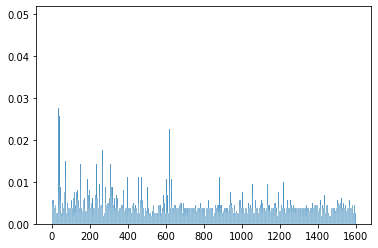

In [12]:
l = list(centrality.items())

# plot
fig, ax = plt.subplots()
y= []

for i in l:
    y.append(i[1])
x = [i for i in range(len(y))]
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.2)
plt.savefig('centrality_distribution.png')
plt.show()

## Find communites

In [19]:
communities = girvan_newman(G, most_valuable_edge=None)
node_groups = []
for com in next(communities):
    node_groups.append(list(com))
cmap = plt.get_cmap('viridis')

colors = cmap(np.linspace(0, 1, 100))

color_index = 0
color_map = {}
for node in G:
    color_index = 0
    node_added = False
    for node_group in node_groups:
        if node in node_group:
            color_map[node] = colors[color_index]
        color_index += 1
        node_added = True
    if node_added is False:
        color_map[node](colors[color_index])

In [ ]:
nw.visualize(G)